In [1]:
import tensorflow as tf
import numpy as np
import math
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

mnsit=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnsit.load_data()
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)


5

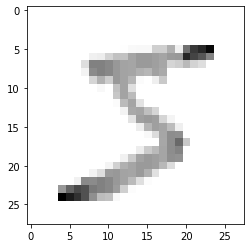

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
y_train[0]

In [3]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer="adam",
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
model.fit(np.concatenate((x_test,x_train)),np.concatenate((y_test,y_train)),epochs=10,batch_size=20)



Epoch 1/10
2188/2188 [==============================] - 2s 780us/step - loss: 0.2445 - accuracy: 0.9278
Epoch 2/10
2188/2188 [==============================] - 2s 782us/step - loss: 0.0973 - accuracy: 0.9696
Epoch 3/10
2188/2188 [==============================] - 2s 763us/step - loss: 0.0668 - accuracy: 0.9793
Epoch 4/10
2188/2188 [==============================] - 2s 781us/step - loss: 0.0502 - accuracy: 0.9839
Epoch 5/10
2188/2188 [==============================] - 2s 775us/step - loss: 0.0381 - accuracy: 0.9877
Epoch 6/10
2188/2188 [==============================] - 2s 778us/step - loss: 0.0302 - accuracy: 0.9903
Epoch 7/10
2188/2188 [==============================] - 2s 793us/step - loss: 0.0236 - accuracy: 0.9920
Epoch 8/10
2188/2188 [==============================] - 2s 766us/step - loss: 0.0204 - accuracy: 0.9930
Epoch 9/10
2188/2188 [==============================] - 2s 770us/step - loss: 0.0174 - accuracy: 0.9936
Epoch 10/10
2188/2188 [==============================] - 2s 764u

In [51]:
loss,acc=model.evaluate(x_test,y_test)
print(x_test.shape,y_test.shape,type(x_test),type(y_test))
print(loss,acc)

313/313 [==============================] - 0s 447us/step - loss: 0.0084 - accuracy: 0.9968
(10000, 28, 28) (10000,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
0.008406063541769981 0.9968000054359436


In [77]:
def readgray(path):
    img = mpimg.imread(path)     
    x= np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    for i in range(len(x)):
        for j in range(len(x[i])) :
            x[i][j]=math.ceil( x[i][j])
            x[i][j]=255-x[i][j]

    return x 




In [79]:
hand0=readgray("hand/0.jpg")
hand1=readgray("hand/1.jpg")
hand2=readgray("hand/2.jpg")
hand3=readgray("hand/3.jpg")
hand4=readgray("hand/4.jpg")
hand5=readgray("hand/5.jpg")
hand6=readgray("hand/6.jpg")
hand7=readgray("hand/7.jpg")
hand8=readgray("hand/8.jpg")
hand9=readgray("hand/9.jpg")

dig0=readgray("DIGITS/0.jpg")
dig1=readgray("DIGITS/1.jpg")
dig2=readgray("DIGITS/2.jpg")
dig3=readgray("DIGITS/3.jpg")
dig4=readgray("DIGITS/4.jpg")
dig5=readgray("DIGITS/5.jpg")
dig6=readgray("DIGITS/6.jpg")
dig7=readgray("DIGITS/7.jpg")
dig8=readgray("DIGITS/8.jpg")
dig9=readgray("DIGITS/9.jpg")
pics=[hand0,hand1,hand2,hand3,hand4,hand5,hand6,hand7,hand8,hand9,dig0,dig1,dig2,dig3,dig4,dig5,dig6,dig7,dig8,dig9]
pics2=[hand0,hand1,hand2,hand3,hand4,hand5,hand6,hand7,hand8,hand9,dig0,dig1,dig2,dig3,dig4,dig5,dig6,dig7,dig8,dig9]
for i in range(len(pics)):
    pics[i]=pics[i].reshape(1,784)
picsarray=np.array(pics2)
picsvals=np.array([0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9])


In [80]:
x=model.predict([pics[4]])
x[0]
np.argmax(x[0])


8

In [81]:
print(x_test.shape,y_test.shape,type(x_test),type(y_test))
print(picsarray.shape,picsvals.shape,type(picsarray),type(picsvals))
loss,acc=model.evaluate(x_test,y_test)

print(model.evaluate(picsarray,picsvals))


(10000, 28, 28) (10000,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20, 28, 28) (20,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
1/1 [==============================] - 0s 997us/step - loss: 2015.6633 - accuracy: 0.7000
[2015.663330078125, 0.699999988079071]


In [76]:
pics02=readgray("02.jpg")
pics02=pics02.reshape(1,784)
out=model.predict([pics02])
np.argmax(out[0])


2

In [83]:
model.save("imnost.model")
model.save_weights("imnist.weights")

INFO:tensorflow:Assets written to: imnost.model\assets
